# Pretrained Networks

![CNN-Architecture-over-a-timeline](https://www.aismartz.com//blog/wp-content/uploads/2019/10/CNN-Architecture-over-a-timeline.jpg)

https://www.aismartz.com/blog/cnn-architectures/

+ WHAT?
    + it is a network which was trained on a large dataset on a large-scale-image classification Task. One can usit as it is for image classification or for transfer learning so we can custumise the model for a new task
    
+ BENEFITS
    + we don't have to train the model
    + very easy to incorporate 
    + fast simulation
    + we can achieve very good performaces
    
+ EXAMPLE
 + U net: recognize feature on medical images
 + MobileNet
 + VGG16/19
 + ResNet
 + InceptionV3
 
 Most of the pretrained networks available in keras are trained on [1000 different classes](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a) that were used from the [Imagenet](https://www.image-net.org/update-mar-11-2021.php) dataset

In [1]:
# import libraries
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image # Keras own inbuild image class
from tensorflow.keras.layers import Dense,Dropout,GlobalAveragePooling2D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential,Input,Model

import numpy as np
import matplotlib.pyplot as plt

Init Plugin
Init Graph Optimizer
Init Kernel


#### Lets load an image from internet that belong under any of the 1000 classes (few images present in images directory )

We will then use a pretrained model (VGG16) and check the classification result

#### Information about the other CNN architectures
https://www.tensorflow.org/api_docs/python/tf/keras/applications


https://keras.io/api/applications/

### Read the image as a PIL object and resize to a desired dimension(ideally the same shape as the one which the pretrained model is trained on)

In [74]:
img = image.load_img('images/download.jpeg',target_size=(224,224)) 

In [75]:
type(img)

PIL.Image.Image

In [76]:
#convert image to array, can also specify datatype
img = image.img_to_array(img,dtype='uint8')

In [77]:
img.shape

(224, 224, 3)

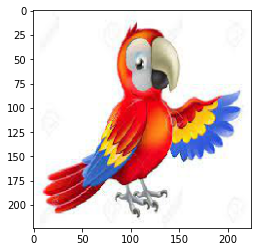

In [78]:
#plot image 
plt.imshow(img)

#### Load model
#### As an example we are using the VGG16 pretrained model

In [79]:
# initialize the model
model = VGG16()

In [80]:
#show model summary
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Take a look at how many parameters needs to be trained for this model

In [81]:
#check shape required by model
model.input.shape

TensorShape([None, 224, 224, 3])

##### Expand dimensions

In [82]:
# Reshape to match the input shape required by the model
img = np.expand_dims(img,axis=0) # or img = img.reshape(1,224,224,3)

In [83]:
img.shape

(1, 224, 224, 3)

In [84]:
pred = model.predict(img)

2024-07-17 12:55:07.776269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [85]:
#shape of pred
pred.shape

(1, 1000)

In [86]:
# decode labels
decode_predictions(pred)

[[('n03908714', 'pencil_sharpener', 0.36405313),
  ('n03476684', 'hair_slide', 0.19229016),
  ('n04033901', 'quill', 0.09922019),
  ('n02783161', 'ballpoint', 0.07394981),
  ('n04116512', 'rubber_eraser', 0.06546175)]]

!! We got the wrong result while predicting from our pretrained model !! 

This brings us to point of applying preprocessing to the image when using pretrained models

### Preprocess

## why do we need to preprocess image before loading to CNN model ??

To get best predictions we need to preprocess the images, just as it was done while the researchers were training them

For eg. in VGG16 model
> The images are converted from RGB to BGR, then each color channel is zero-centered with respect to the ImageNet dataset, without scaling.

https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input

In [87]:
img = image.load_img('images/download.jpeg',target_size=(224,224)) 
# in the next run try changing the path to images/object.png and test the prediction of pretrained model
img = np.expand_dims(img,axis=0) # or img = img.reshape(1,224,224,3)
img = preprocess_input(img) # preprocess the image in the same method that is used for the pretrained model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


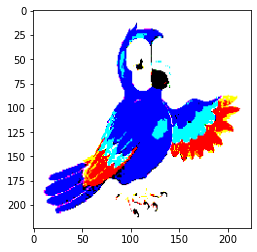

In [88]:
plt.imshow(img[0])

#### Predict

In [89]:
pred = model.predict(img)

2024-07-17 12:55:21.728440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [90]:
#shape of pred
pred.shape

(1, 1000)

In [91]:
# decode labels
decode_predictions(pred)

[[('n01818515', 'macaw', 0.38708833),
  ('n01817953', 'African_grey', 0.08048788),
  ('n04033901', 'quill', 0.06606151),
  ('n03476684', 'hair_slide', 0.045603838),
  ('n04579432', 'whistle', 0.042268183)]]

The model now predicts the image accurately after predicting using the preprocessed image

Now load the `object.png` image from the `images` directory and check the results using VGG16

You should be getting the predicted result as `cleaver`

Discuss why the model predicted a `phone` as `cleaver`

# Transfer Learning

## Transfer Learning for Neural Networks

> Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem. For instance, features from a model that has learned to identify racoons may be useful to kick-start a model meant to identify tanukis (japanese racoons).

__The benefits of transfer learning are:__
* you can reuse pre-trained networks
* it saves lots of training time
* it allows you to train with very small training datasets

__Procedure__
1. Take the weights and architecture of a [pre-trained network](https://keras.io/api/applications/)
2. Load the "convolutional base" of the model (everything except the final dense layers)
3. Freeze all the layers of the base (weights become fixed)
4. Add a fully connected dense layer on top
5. **Add a task specific dense output layer**
6. Compile and fit the model to your data

<img src='https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/Transfer-learning-base-model.jpg?resize=512%2C375&ssl=1'>

## ImageDataGenerator
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

- `class ImageDataGenerator`: Generate batches of tensor image data with **optional** real-time data augmentation

This is an efficient way to load data when you are working with lots of image data which does not fit into the memory (RAM) as you can load and train the model in small batches

In [20]:
# folder names containing images of the things you want to classify
classes = ['phone','wallet']

Data augmentation can address a variety of challenges when training a CNN model, such as limited or imbalanced data, overfitting, and variation and complexity.  eg Flipping,Rotation, Translation, Scaling ... of images

This technique can increase the size of the dataset and balance the classes by applying different transformations.

In [21]:
# define an image data generator
# Data augmentation: Applies random distortions and transformations to the images (only on your training data!).

data_gen = image.ImageDataGenerator(
    # define the preprocessing function that should be applied to all images
    preprocessing_function=preprocess_input,
    # fill_mode='nearest',
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # horizontal_flip=True, 
    # zoom_range=0.2,
    # shear_range=0.2
)

In [22]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: data/images/
   creating: data/train/
   creating: data/validation/
  inflating: data/images/4.jpg       
  inflating: data/images/5.jpg       
  inflating: data/images/2.jpg       
  inflating: data/images/3.jpg       
  inflating: data/images/1.jpg       
  inflating: data/images/0.jpg       
  inflating: data/train/.DS_Store    
  inflating: __MACOSX/data/train/._.DS_Store  
   creating: data/train/wallet/
   creating: data/train/phone/
   creating: data/validation/wallet/
   creating: data/validation/phone/
  inflating: data/train/wallet/16-35-01-774948.png  
  inflating: data/train/wallet/16-35-11-878872.png  
  inflating: data/train/wallet/17-29-36-520367.png  
  inflating: data/train/wallet/16-35-12-773511.png  
  inflating: data/train/wallet/17-19-25-570356.png  
  inflating: data/train/wallet/17-25-14-878556.png  
  inflating: data/train/wallet/16-33-14-896636.png  
  inflating: data/train

In [23]:
# a generator that returns batches of X and y arrays
train_data_gen = data_gen.flow_from_directory(
        directory='data/train',
        class_mode="categorical",
        classes=classes,
        batch_size=150,
        target_size=(224, 224),
)

Found 144 images belonging to 2 classes.


In [24]:
val_data_gen = data_gen.flow_from_directory(
        directory='data/validation/',
        class_mode="categorical",
        classes=classes,
        batch_size=150,
        target_size=(224, 224),
)

Found 6 images belonging to 2 classes.


In [25]:
train_data_gen.class_indices

{'phone': 0, 'wallet': 1}

## Create CNN Model

### 1. Select the convolutional base / Pretrained network

### 2. Freeze the weights

### 3. Add your own dense layers on top

In [26]:
import tensorflow.keras.backend as K
K.clear_session()

#1. Select the convolutional base / Pretrained network
base_model = VGG16(include_top=False)

In [27]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

When loading a given model, the “include_top” argument can be set to False, in which case the fully-connected output layers of the model used to make predictions is not loaded, allowing a new output layer to be added and trained.

### 2. Freeze the weights

In [28]:
#2. Freeze the weights in order to not retrain the loaded pre-trained model
base_model.trainable= False

In [29]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### 3. Add your own dense layers on top, in our case we have only 2 classes to classify `phone/wallet`

Instead of building CNN model from scratch, we are using VGG16 and fine tuning it to fit to our dataset by editing the last few layers of our pretrained model

In [30]:
# 3. Create your model with pretrained network as base model
inputs = Input(shape=(224,224,3))

base = base_model(inputs)

# can also add additional cnn layers if necessary

# dont forget to flatten out before the final layer
flatten = Flatten()(base)

outputs = Dense(2,activation='softmax')(flatten)

model_tf = Model(inputs,outputs)

In [31]:
model_tf.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 50178     
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


### 4. Compile and train!

In [32]:
model_tf.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_tf.fit(train_data_gen,
          verbose=2, # how the training log should get printed 
          epochs=10,
          validation_data=val_data_gen)

Epoch 1/10


2024-07-17 12:51:07.520437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-17 12:51:13.865222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 - 7s - loss: 4.9839 - accuracy: 0.5139 - val_loss: 9.3059 - val_accuracy: 0.5000
Epoch 2/10
1/1 - 6s - loss: 10.4940 - accuracy: 0.5139 - val_loss: 1.2842e-04 - val_accuracy: 1.0000
Epoch 3/10
1/1 - 6s - loss: 1.4561 - accuracy: 0.8542 - val_loss: 2.2746 - val_accuracy: 0.6667
Epoch 4/10
1/1 - 6s - loss: 0.8415 - accuracy: 0.9236 - val_loss: 7.3049 - val_accuracy: 0.5000
Epoch 5/10
1/1 - 7s - loss: 1.6919 - accuracy: 0.8819 - val_loss: 7.1601 - val_accuracy: 0.5000
Epoch 6/10
1/1 - 5s - loss: 1.2167 - accuracy: 0.8889 - val_loss: 3.7830 - val_accuracy: 0.6667
Epoch 7/10
1/1 - 5s - loss: 0.4015 - accuracy: 0.9514 - val_loss: 0.4639 - val_accuracy: 0.8333
Epoch 8/10
1/1 - 5s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 5.7870e-05 - val_accuracy: 1.0000
Epoch 9/10
1/1 - 5s - loss: 3.8908e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 10/10
1/1 - 7s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


### (5. Use it to predict)

In [33]:
model_tf.predict(img)

2024-07-17 12:52:05.949743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[1.000000e+00, 6.513001e-26]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


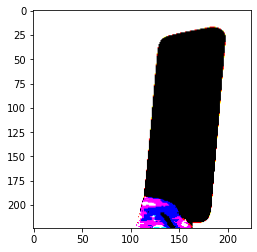

In [34]:
plt.imshow(img[0])

In [35]:
img.shape

(1, 224, 224, 3)

<BarContainer object of 2 artists>

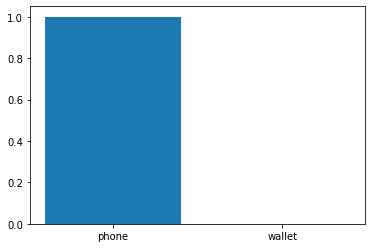

In [36]:
plt.bar(x = ['phone','wallet'], height = model_tf.predict(img)[0])

In [37]:
# For remapping the index values of highest prediction probability to its respective class

pred = model_tf.predict(img)

preds_cls = list(train_data_gen.class_indices.keys())[list(train_data_gen.class_indices.values()).index(np.argmax(pred,axis=-1))]
preds_cls

'phone'

### (6. Save your model for later)

In [38]:
model.save('models/wallet_phone.h5')

## Exercise
- Try out different pretrained models as base like Resnet50
- Choose any [image classification dataset](https://www.kaggle.com/datasets?search=image) and build your CNN model (optional)
    - Try building your CNN model from scratch
    - Use transfer learning approach to train your CNN model

- For running big CNN models with bigger datasets, sometimes your laptop hardware may not be sufficient 
    - You can use free cloud resources for training such models as they provide you with free GPU as well (GPU speeds up training)
    - [Google Colab](https://colab.research.google.com/)
    - [Kaggle kernel](https://www.kaggle.com/code) (click on `New notebook`, also you will need to verify phone number inorder to use GPU)

# Loading the entire images and labels into arrays (alternate)

In [39]:
# Let's explore the data folder
import os
base_path = 'data/train/'

# Let's define the classes
classes = os.listdir(base_path)

In [40]:
 for class_ in classes:
        print(class_)

.DS_Store
wallet
phone


In [41]:
def load_image(base_path):
    """it loads all the image into X and the classes in y """
    X_list = []
    y_list = []
    classes = os.listdir(base_path)
    for class_ in classes:
        if class_!='.DS_Store':
        
            files = os.listdir(base_path+class_)
            for file in files:
                pic = image.load_img(path=base_path+class_+'/'+f'{file}',target_size=(224,224))
                numpy_image = np.array(pic)
                processed_image = preprocess_input(numpy_image)
                X_list.append(processed_image)
                y_list.append(class_)

    X = np.array(X_list)
    y = np.array(y_list)
    
    return X, y, classes

In [42]:
X,y,classes= load_image(base_path)

In [43]:
X.shape

(144, 224, 224, 3)

In [44]:
y

array(['wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'wallet', 'wallet', 'wallet', 'wallet', 'wallet', 'wallet',
       'phone', 'phone', 'phone', 'phone', 'phone', 'phone', 'phone',
       'phone', 'phone', 'phone', 'phone', 'phone', 'phone', 'phone',
       'phone', 'phone', 'phone', 'phone', 'phone', 'phone', 'phone',
       'phone', 'phone', 'phone', 'phone', 'phone', '

In [45]:
my_dict = {"wallet":0, "phone":1}

In [46]:
# map strings to binary labels
y = np.vectorize(my_dict.get)(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [47]:
!rm -rf __MACOSX
!rm -rf data/
!rm -rf .DS_Store

# Additional links


https://keras.io/guides/transfer_learning/

https://www.tensorflow.org/tutorials/images/data_augmentation



[Guide for Transfer learning](https://neptune.ai/blog/transfer-learning-guide-examples-for-images-and-text-in-keras)